In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cabdata/Cab_Data.csv
/kaggle/input/cabdata/City.csv
/kaggle/input/cabdata/Customer_ID.csv
/kaggle/input/cabdata/Transaction_ID.csv


In [2]:
data = pd.read_csv('../input/cabdata/Cab_Data.csv')
cities = pd.read_csv('../input/cabdata/City.csv')
customers = pd.read_csv('../input/cabdata/Customer_ID.csv')
trx = pd.read_csv('../input/cabdata/Transaction_ID.csv')

In [3]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cities.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
customers.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
trx.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
print(data.shape)
print(cities.shape)
print(customers.shape)
print(trx.shape)

(359392, 7)
(20, 3)
(49171, 4)
(440098, 3)


Joining Transactions and Customers Tables with the Cab data table

In [8]:
newdata = data.set_index('Transaction ID').join(trx.set_index('Transaction ID'))
newdata.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
Transaction ID,,,,,,,,
10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [9]:
new = newdata.join(customers.set_index('Customer ID'), on='Customer ID')
new.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
Transaction ID,,,,,,,,,,,
10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


# **Final Data Look after Joins:**

In [10]:
# Adding The Gross Column to the dataframe
new['Gross'] = new['Price Charged'] - new['Cost of Trip']
new.reset_index(inplace=True)
new.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Gross
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,16.844


In [11]:
pip install xlrd

     |████████████████████████████████| 96 kB 1.0 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [12]:
# xlrd is a library for reading data and formatting information from Excel files in the historical .xls format.
# I used it here to convert the 'Date of Travel' column to datetime format
import xlrd
  
new['Date of Travel'] = new['Date of Travel'].apply(
    lambda s: xlrd.xldate.xldate_as_datetime(s, 0)
                                                    )
new.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Gross
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,16.844


In [13]:
new.shape

(359392, 13)

In [14]:
# Checking whether there's is Null Values
new.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Gross                 0
dtype: int64

In [15]:
# Creating two minor tables for each company
yelw_cities = new.loc[new['Company']=='Yellow Cab']
pnk_cities = new.loc[new['Company']=='Pink Cab']
yelw_cities.reset_index(inplace=True)
pnk_cities.reset_index(inplace=True)
print(yelw_cities.shape[0])
print(pnk_cities.shape[0])

274681
84711


# **Plotting Transactions Num. & The Cost of Trips and The Gross on Daily basis For Comparison**

From the plots below we can get to know the particular times for max number of trips and profit has been made.

Text(0.5, 0.98, 'Transaction No.')

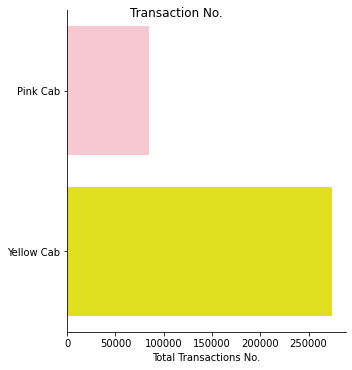

In [16]:
# Transactions' total Num for each Company

ax = sns.catplot(y="Company", kind="count",palette=['pink','yellow'], data=new)
ax.set_axis_labels('Total Transactions No.', '')
ax.fig.suptitle('Transaction No.')

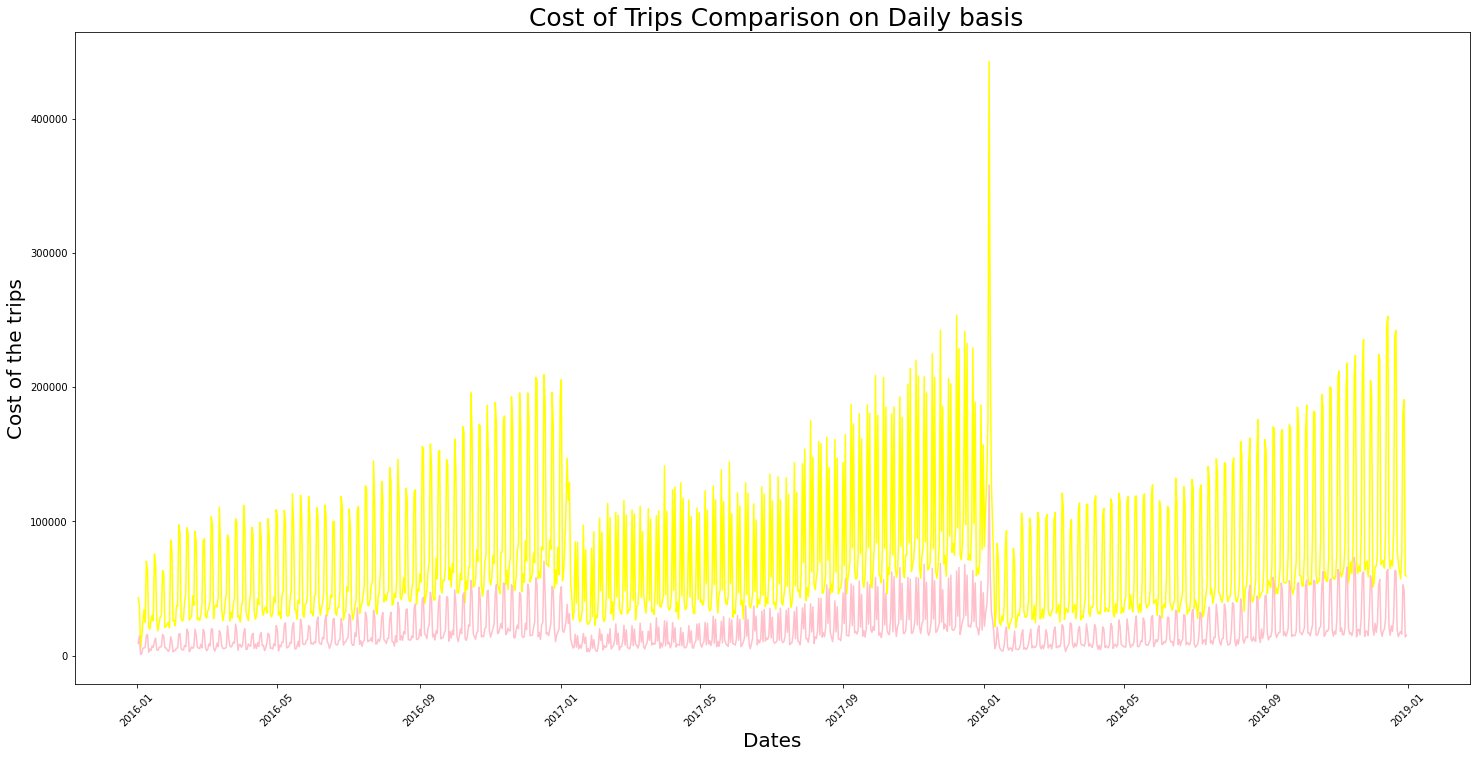

In [17]:
# Cost of daily Trips comparison between the Two Companies

# Grouping Cost and Dates for Ploting and analysis
yelw_cost =yelw_cities.groupby(['Date of Travel'])['Cost of Trip'].sum()
pnk_cost =pnk_cities.groupby(['Date of Travel'])['Cost of Trip'].sum()
list_of_dates=new.groupby(['Date of Travel']).sum().reset_index()['Date of Travel']

# Plotting:


plt.figure(figsize=(25,12))
plt.plot(list_of_dates,yelw_cost, color='yellow')
plt.plot(list_of_dates,pnk_cost,color='pink')
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Cost of the trips',fontsize=20)
plt.title(' Cost of Trips Comparison on Daily basis',fontsize=25)
plt.xticks(rotation=45)
plt.show()

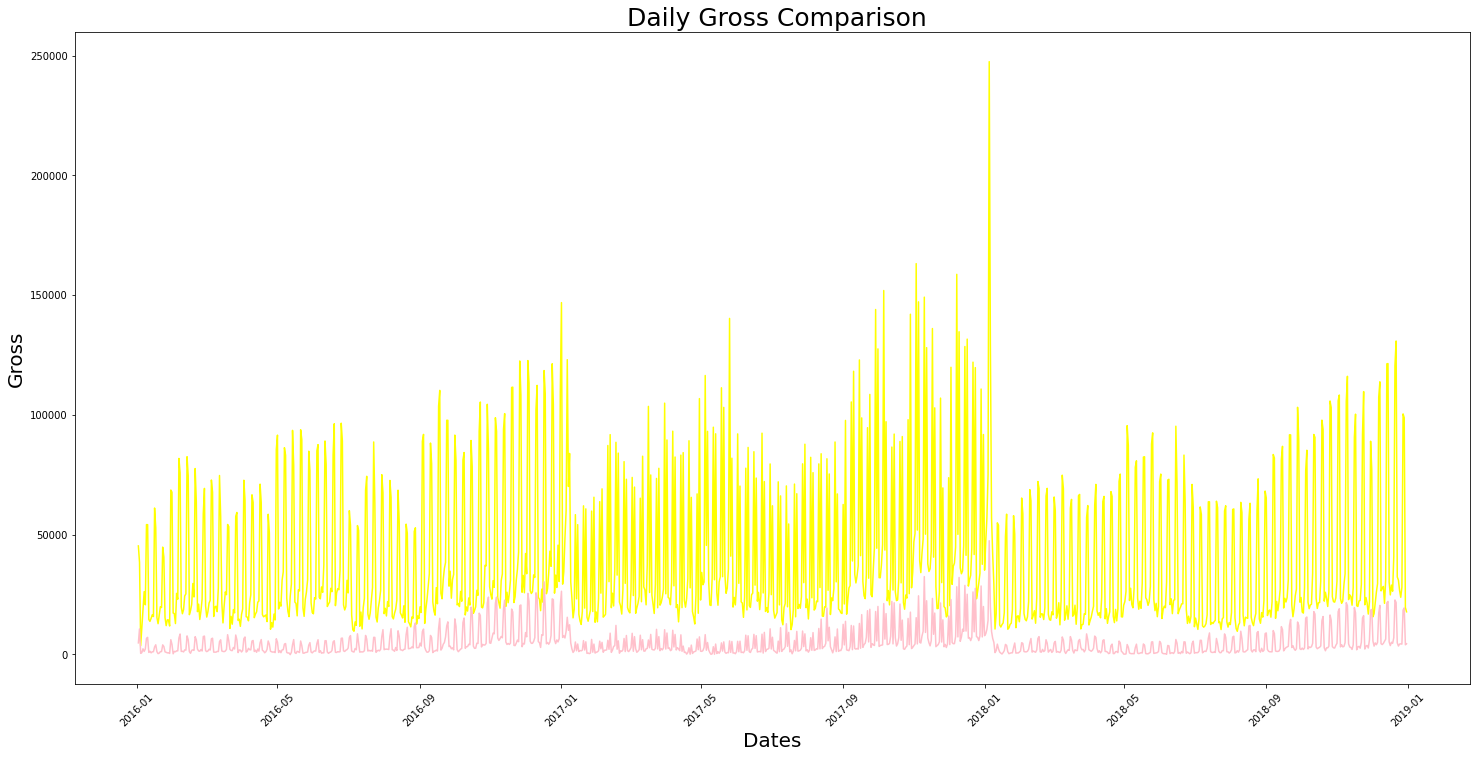

In [18]:
# Gross of daily Trips comparison between the Two Companies

# Grouping Gross and Dates for Ploting and analysis
yelw_gross =yelw_cities.groupby(['Date of Travel'])['Gross'].sum()
pnk_gross =pnk_cities.groupby(['Date of Travel'])['Gross'].sum()

# Plotting:
plt.figure(figsize=(25,12))
plt.plot(list_of_dates,yelw_gross, color='yellow')
plt.plot(list_of_dates,pnk_gross,color='pink')
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Gross',fontsize=20)
plt.title(' Daily Gross Comparison',fontsize=25)
plt.xticks(rotation=45)
plt.show()

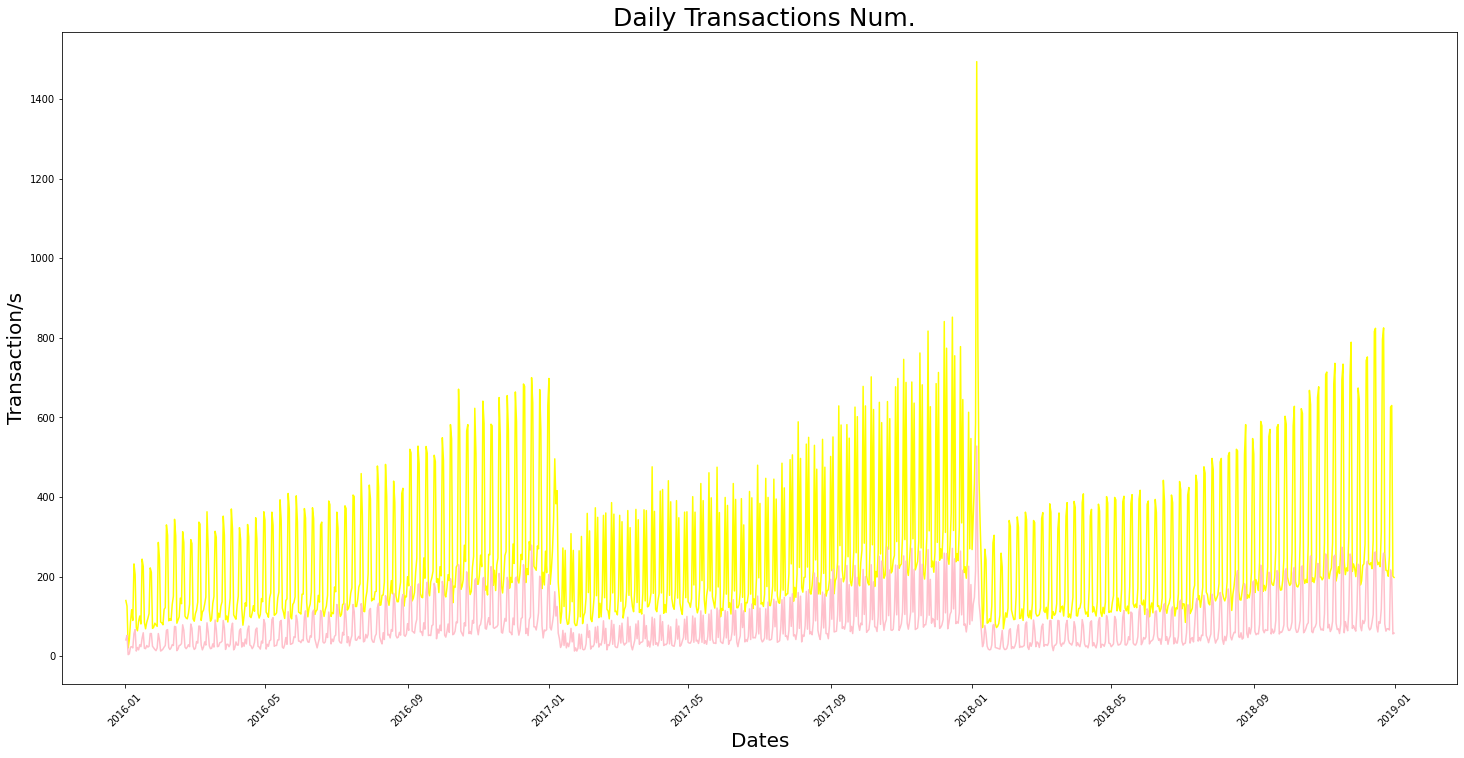

In [19]:
# Daily  comparison between the Two Companies in Number of Transaction

# Grouping Gross and Dates for Ploting and analysis
yelw_trans =yelw_cities.groupby(['Date of Travel'])['Transaction ID'].count()
pnk_trans =pnk_cities.groupby(['Date of Travel'])['Transaction ID'].count()

# Plotting:


plt.figure(figsize=(25,12))
plt.plot(list_of_dates,yelw_trans, color='yellow')
plt.plot(list_of_dates,pnk_trans,color='pink')
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Transaction/s',fontsize=20)
plt.title(' Daily Transactions Num.',fontsize=25)
plt.xticks(rotation=45)
plt.show()

# **Bar Charts for both Companies Presence among US cities**

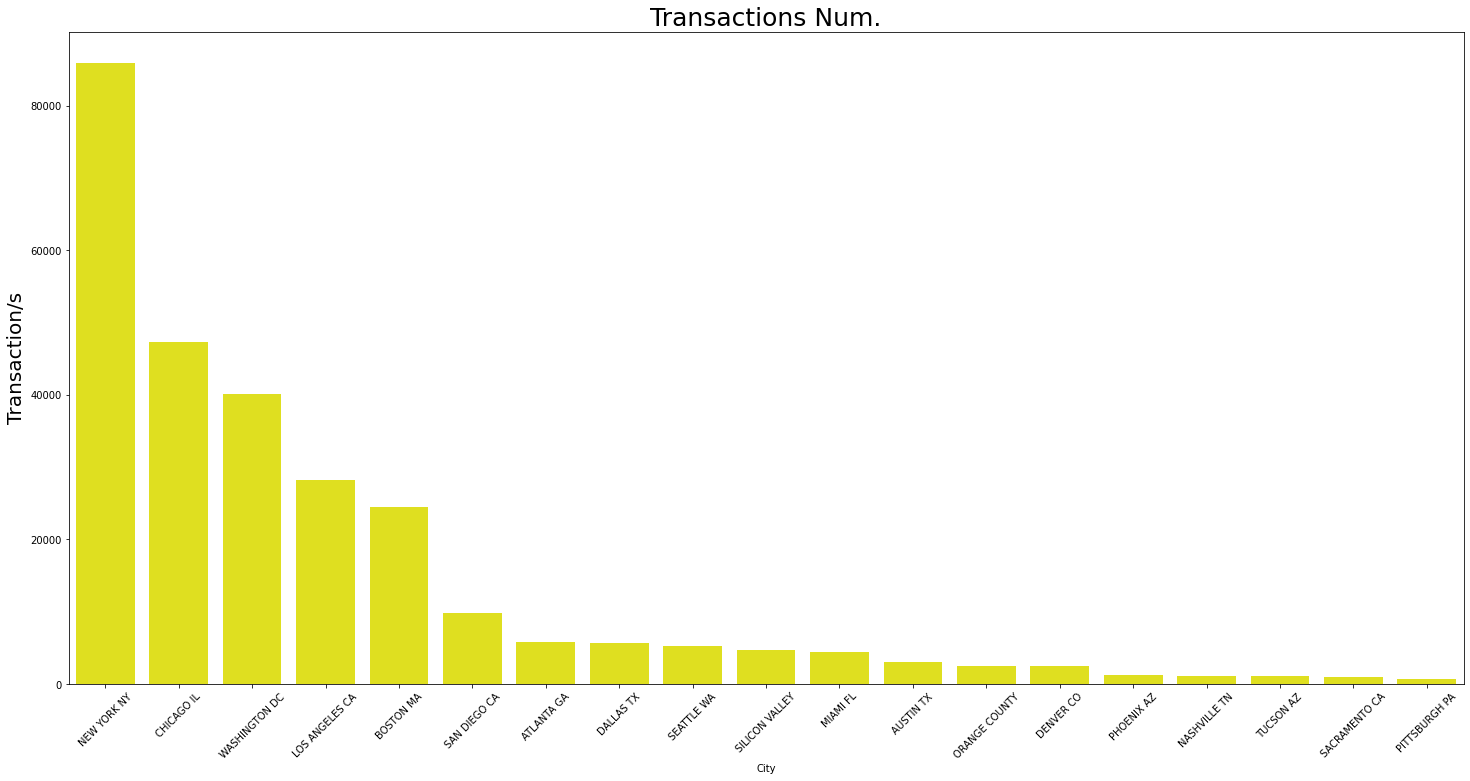

In [20]:
# Yellow Cab presence in the cities according to its transactions number

plt.figure(figsize=(25,12))
plt.xticks(rotation=45)
yel_cities= sns.countplot(x='City', data = yelw_cities,
                          order= yelw_cities.groupby('City')['City'].count().sort_values(ascending=False).index.values,
                          palette=['yellow'])
plt.ylabel('Transaction/s',fontsize=20)
plt.title('Transactions Num.',fontsize=25)
plt.show()

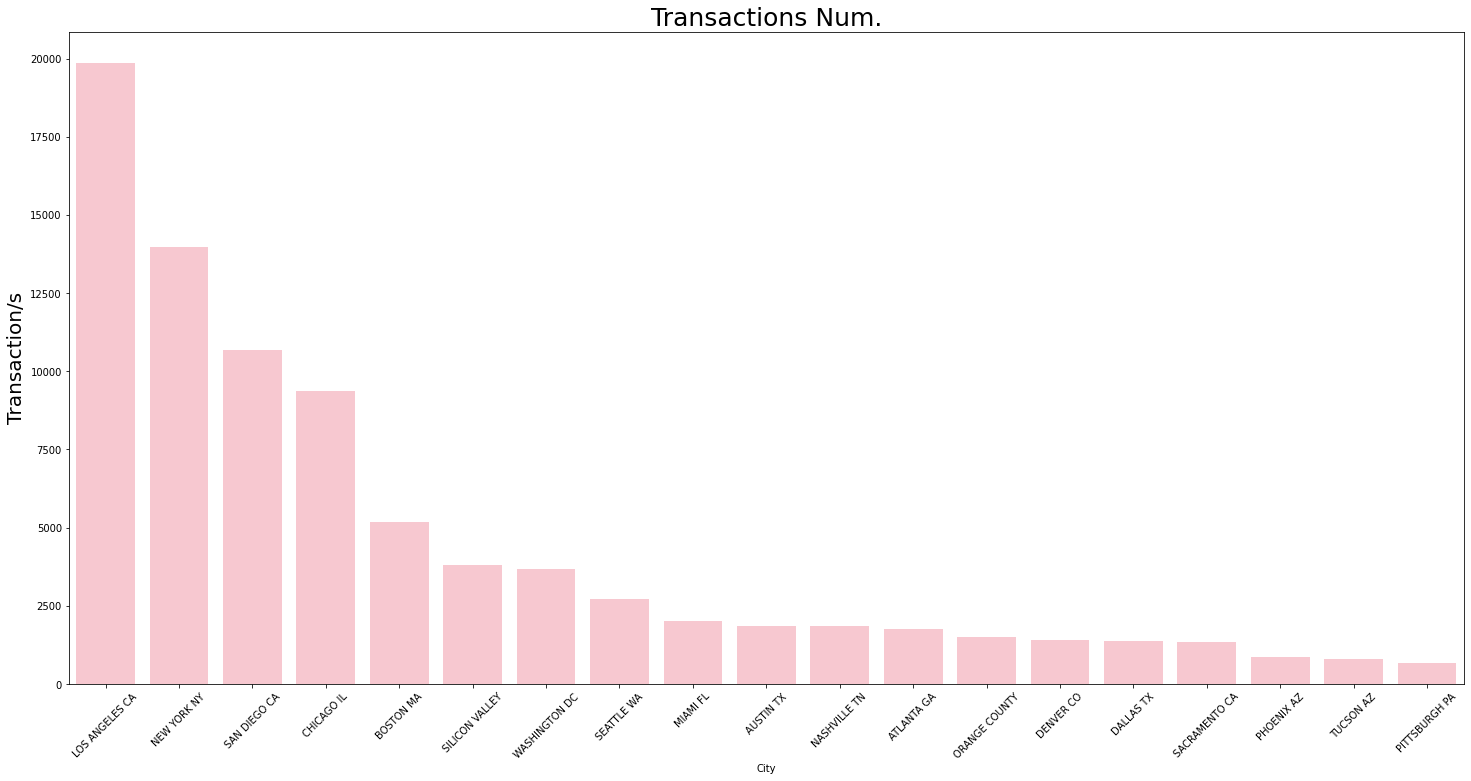

In [21]:
# Pink Cab presence in the cities according to its transactions number

plt.figure(figsize=(25,12))
plt.xticks(rotation=45)
pk_cities= sns.countplot(x='City', data = pnk_cities,
                          order= pnk_cities.groupby('City')['City'].count().sort_values(ascending=False).index.values,
                          palette=['pink'])
plt.ylabel('Transaction/s',fontsize=20)
plt.title('Transactions Num.',fontsize=25)
plt.show()

# **Scatter plots to study the relation between the Gross and Customer Counts**

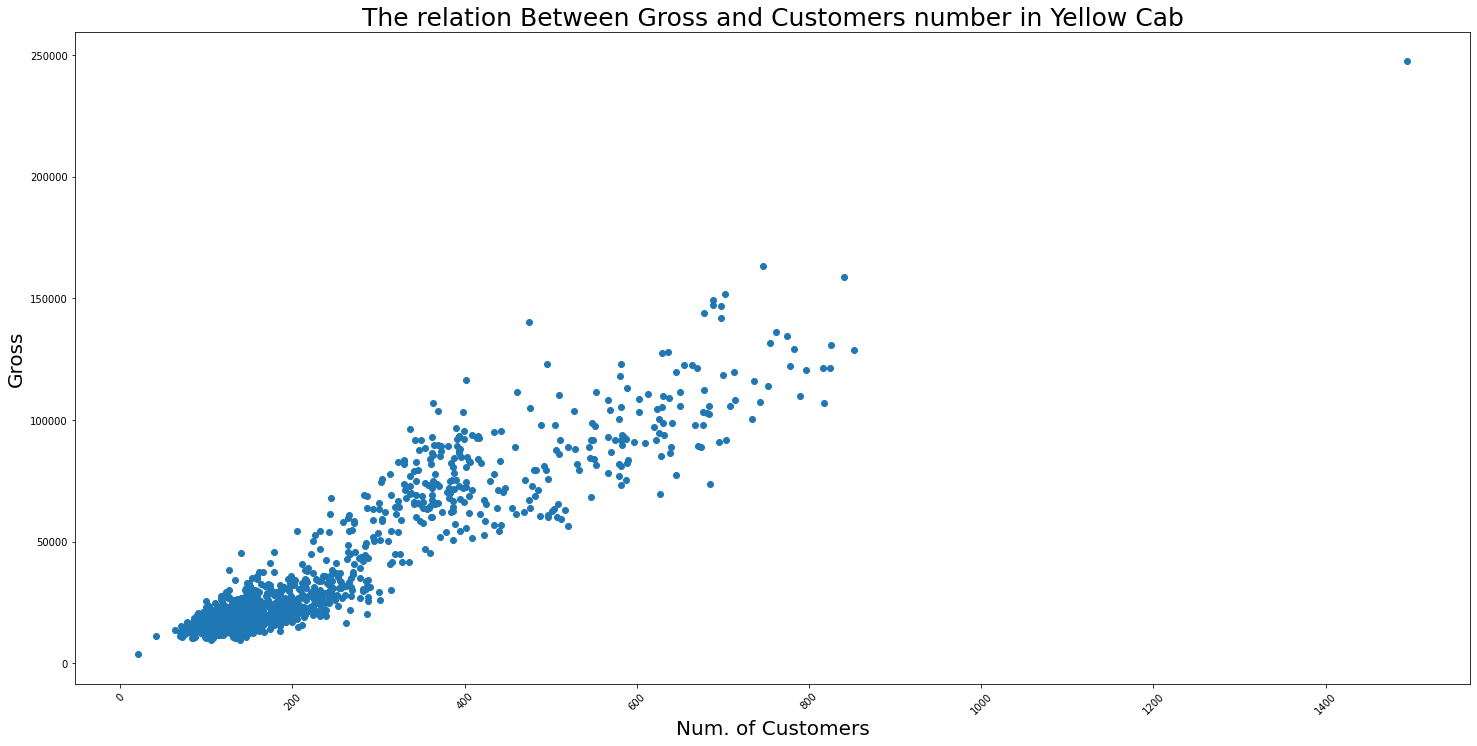

In [22]:
# The correlation between No. of Customers & Gross in Yellow Cab

# Grouping Customer Num. According to the dates
yelw_cus = yelw_cities.groupby(['Date of Travel'])['Customer ID'].count()


# Scatter Plot
plt.figure(figsize=(25,12))
plt.scatter(yelw_cus,yelw_gross)
plt.ylabel('Gross',fontsize=20)
plt.xlabel('Num. of Customers',fontsize=20)
plt.title('The relation Between Gross and Customers number in Yellow Cab',fontsize=25)
plt.xticks(rotation=45)
plt.show()

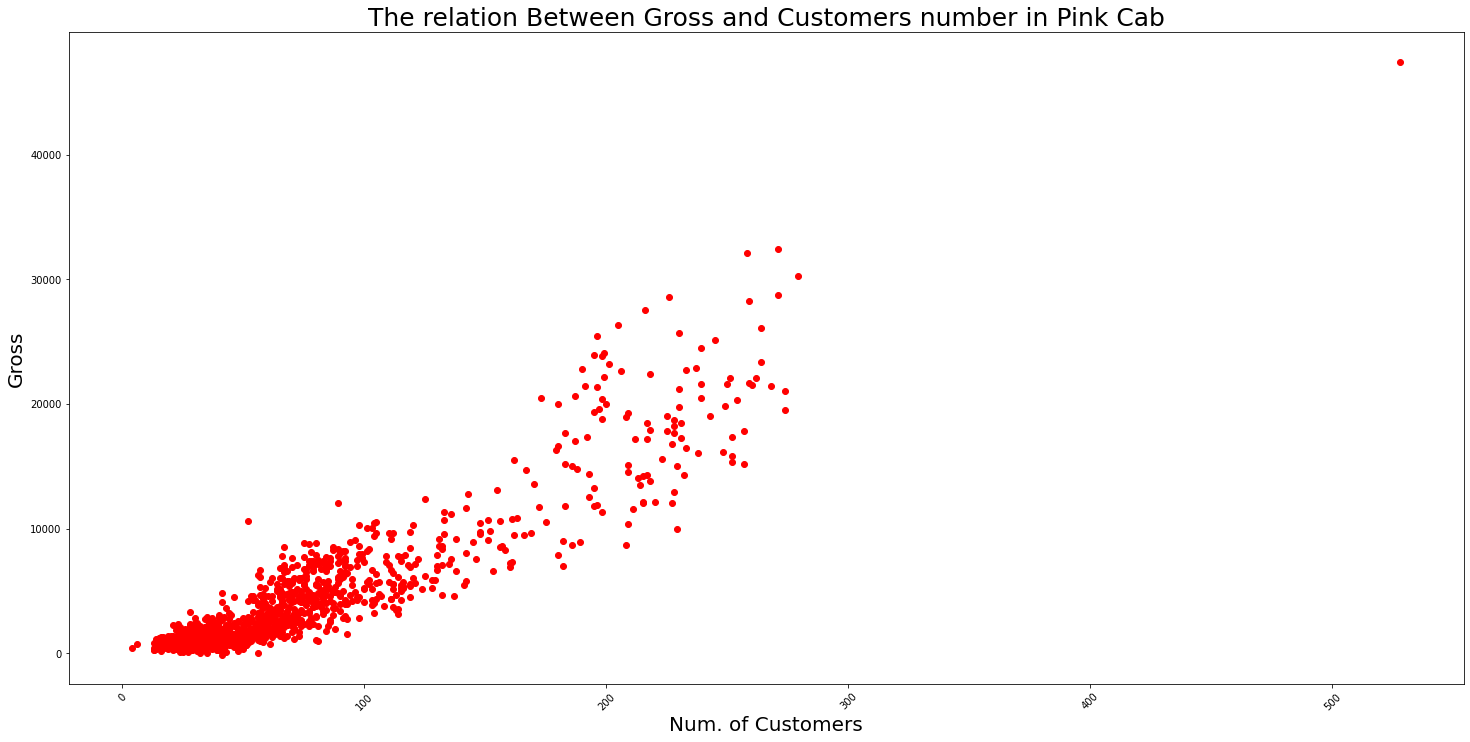

In [23]:
# The correlation between No. of Customers & Gross in Pink Cab

# Grouping Customer Num. According to the dates
pink_cus = pnk_cities.groupby(['Date of Travel'])['Customer ID'].count()


# Scatter Plot
plt.figure(figsize=(25,12))
plt.scatter(pink_cus,pnk_gross,color='r')
plt.ylabel('Gross',fontsize=20)
plt.xlabel('Num. of Customers',fontsize=20)
plt.title('The relation Between Gross and Customers number in Pink Cab',fontsize=25)
plt.xticks(rotation=45)
plt.show()

In [24]:
# Conclusion for the relation between Cutomers and Gross
print('The correlation in Yellow cab between Customers Num. and Gross is:', np.corrcoef(yelw_cus,yelw_gross)[1,0])
print('The correlation in Pink cab between Customers Num. and Gross is:', np.corrcoef(pink_cus,pnk_gross)[1,0])

The correlation in Yellow cab between Customers Num. and Gross is: 0.9324755708039254
The correlation in Pink cab between Customers Num. and Gross is: 0.920828354647146


# **Studying the attributes of the Customers**

46148


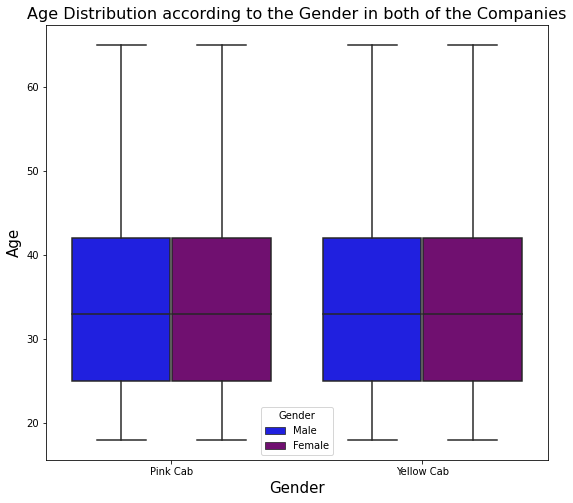

In [25]:
# Cusromers attributes Exploratory

#Age distribution between males and females in both companies

# Droping duplicates of Customer ID's for average age calcuation
no_cust_dup =new.drop_duplicates(subset=['Customer ID'])
print(no_cust_dup.shape[0])

# Plotting Age
plt.figure(figsize=(9,8))
sns.boxplot(data=no_cust_dup, x='Company', y='Age',hue='Gender',palette=['blue','purple'])
plt.title('Age Distribution according to the Gender in both of the Companies',fontsize=16)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.show()

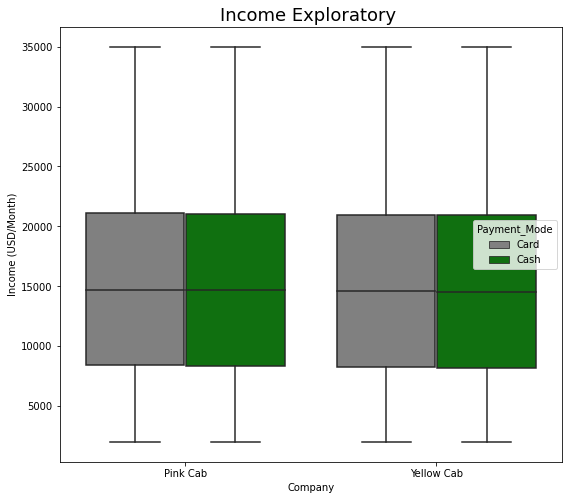

In [26]:
# Income Exploratory

# Plotting Income
plt.figure(figsize=(9,8))
sns.boxplot(data=no_cust_dup, x='Company', 
            y='Income (USD/Month)',
            hue='Payment_Mode',
            palette=['grey','green'])
plt.title('Income Exploratory ',fontsize=18)
plt.show()

In [27]:
# The average age of the Customers
no_cust_dup.groupby(['Company','Gender'])['Age'].agg('mean').round(0)

Company     Gender
Pink Cab    Female    35.0
            Male      35.0
Yellow Cab  Female    35.0
            Male      35.0
Name: Age, dtype: float64

In [28]:
# Common Customers Exploratory and unique Customers
yel_cust_uniq = np.asarray(np.unique(yelw_cities['Customer ID']))
pnk_cust_uniq = np.asarray(np.unique(pnk_cities['Customer ID']))
customers_intersection = len(np.intersect1d(yel_cust_uniq, pnk_cust_uniq))
print('Unqiue total Customers Num. in Yellow Cab is:',len(yel_cust_uniq))
print('Unqiue total Customers Num. in Pink Cab is:',len(pnk_cust_uniq))
print('The common Num. of Customers between the two Companies is: {} Customer'.format(customers_intersection))


Unqiue total Customers Num. in Yellow Cab is: 39896
Unqiue total Customers Num. in Pink Cab is: 32330
The common Num. of Customers between the two Companies is: 26078 Customer


In [29]:
# The average income of the Customers
no_cust_dup.groupby('Company')['Income (USD/Month)'].agg('mean').round(0)

Company
Pink Cab      15094.0
Yellow Cab    14952.0
Name: Income (USD/Month), dtype: float64

In [30]:
# Payment Mode Counts in each Company
no_cust_dup.groupby(['Company','Payment_Mode'])['Payment_Mode'].agg('count')

Company     Payment_Mode
Pink Cab    Card             8949
            Cash             5880
Yellow Cab  Card            18868
            Cash            12451
Name: Payment_Mode, dtype: int64

In [31]:
# What do the genders prefer to ride with:
no_cust_dup.groupby(['Gender','Company'])['Company'].agg('count')

Gender  Company   
Female  Pink Cab       7010
        Yellow Cab    14463
Male    Pink Cab       7819
        Yellow Cab    16856
Name: Company, dtype: int64